(sec:tree_based_px)=

# Tree Based Classifiers

&nbsp;&nbsp;&nbsp; Common classification methods are based on a decision tree (see {ref}`sec:MLt`). We first applied to the pixel dataset tree based algorithms.

(sec:RF)=

## Random forest

&nbsp;&nbsp;&nbsp; **Random forest (RF)** algorithm is a tree based classification algorithm proposed by {cite:p}`RF`. The principle is to generate several decision trees from a double random sample on observation (pixels here) and variable. The final decision tree is determined by the vote of all trees. This method is popular due to the simplicity of use and comprehension. RF has also a reduced computational cost, because compute the solution of several simple decision trees with few observations is easier than compute the solution of one big tree. 

&nbsp;&nbsp;&nbsp; RF is the first classification algorithm that we used in the pixel dataset. The [Figure 3.1](fig:RF_ls) presents the results of the cross validation method which consists to train the model successively on 4 fold (here our pictures) and test on the last fold and repeat ttesting on every picture with a earning on others. We can also see in [Figure 3.1](fig:RF_ls) the ROC curve where the 5 points of the tests have been placed. We can see that the position of points on ROC curve, referring to recall and specificity (see {ref}`sec:class_eval`), are next to left down corner that involve that model predict exclusively $0$ labels. In other words, RF tents to predict only zeros because of the similarity of all observations (see {ref}`sec:PCA_px`). The accuracy score is high because of the high majority of zeros in the dataset. The [Figure 3.2](fig:RF_CMp) represents the confusion matrix and the normalized confusion matrix corresponding to the test on the sample CI04 and also the projection of the prediction on the picture of true labels. This last one confirm that RF predict only zeros. 

&nbsp;&nbsp;&nbsp; After these results, we knew that we will have to use more powerful algorithms to find a good classification. We tried to use the **Gradient boost** classifier which applies a gradient descent to find the solution of a random forest like algorithm, but the results were similar to random forest if not worse.


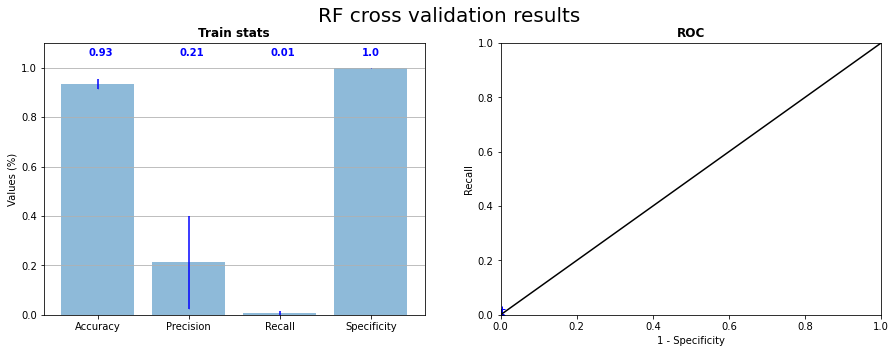

In [31]:
# NO CODE

import numpy as np
import sys
sys.path.append("../../scripts/")
import utils

import matplotlib.pyplot as plt

file_res = "../../../RUN_GRICAD/res/CV_RF_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_RF_confmats.txt"

utils.plot_res_CV(file_res,Rcurve =False)

:::{figure-md} fig:RF_ls
<img src="../../img/vide.png" >

Random forest cross validation on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:RF_CMp
<img src="../../img/RF_CMp.png" >

Confusion matrix of prediction of RF on CI04 with learning on 4 others samples with projection of the prediction.
:::

(sec:XGB)=

## Extreme Gradient Boosting

&nbsp;&nbsp;&nbsp; **Extreme Gradient Boosting (XGB)** is another type of tree based algorithm which apply a gradient descent to find the best decision tree corresponding to data proposed by {cite:p}`XGB`. We used it to involve the results of RF and keep a tree based algorithm. Due to the high speed of computation of the XGB method, we have tested more combination of parameters and some data selection.

&nbsp;&nbsp;&nbsp; The [Figure 3.3](fig:XGB_ls) presents the learning statistics of the cross validation with XGB and the corresponding ROC curve. We can see that compared to the [Figure 3.1](fig:RF_ls), points on ROC curve are a little bit detached from the down left corner. The global result remains not good but is better that RF result. The [Figure 3.4](fig:XGB_CMp) representing the confusion matrix and the projection of prediction on CI04 confirms that the prediction remains weak. 

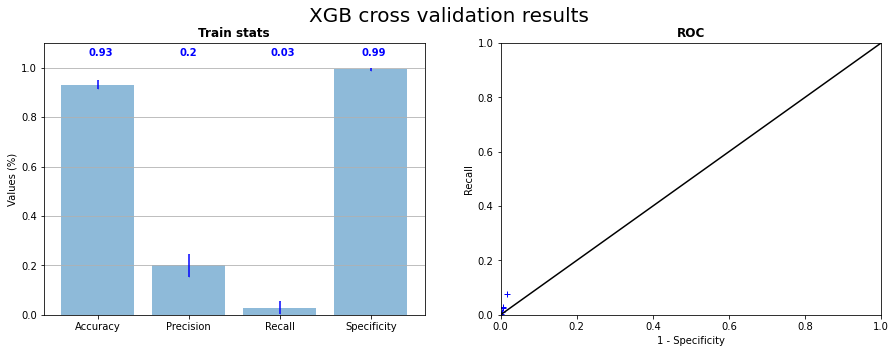

In [35]:
# NO CODE

file_res = "../../../RUN_GRICAD/res/CV_XGB_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_XGB_confmats.txt"

utils.plot_res_CV(file_res,Rcurve =False)

:::{figure-md} fig:XGB_ls
<img src="../../img/vide.png" >

X Gradient Boost cross validation on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:XGB_CMp
<img src="../../img/XGB_CMp.png" >

Confusion matrix of prediction of XGB on CI04 with learning on 4 others samples with projection of the prediction.
:::

(sec:XGB_US_OS)=

## Balancing dataset : Oversampling and Undersampling

&nbsp;&nbsp;&nbsp; Dataset being hard unbalanced ($4$ to $10 \%$ of $1$), the cost to make a classification mistake on an observation labeled as RX is low compared to the cost to miss many 0. Algorithms have then a trend to choose to minimize the errors on the larger category. To go around this problem, several options are possible. We choose to do first **oversampling** and **undersampling** on the pixel dataset. The idea of these methods is to increase the number of observations of the minority class by duplication or reduce the number of observations of the majority class by sampling. Both methods gives at the end balanced sample from the initial dataset. The [Figure 3.5](fig:OS_US) represents theses methods by a schema. Using undersampling may lose part of the information of the majority class when oversampling can lead to overfitting. That's why this kind of method is to use with precausion. 

:::{figure-md} fig:OS_US
<img src="../../img/os_us.png" >

Representation of undersampling and oversampling
:::

&nbsp;&nbsp;&nbsp; Using undersampling and oversampling allows us to get better results with XGB as show [Figure 3.6](fig:XGB-OS_ls), [Figure 3.7](fig:XGB-OS_CMp), [Figure 3.8](fig:XGB-US_ls) and [Figure 3.9](fig:XGB-US_CMp). We can see on cross validation results that recall is becoming high until it is not more than $20 \%$. With balanced data, XGB seams to be able to not predict $0$ for every observation, but it is still a weak prediction. Undersampling has a little bit better results, but there are not as much stable as results of oversampling, due to the random sampling of the majority class.

&nbsp;&nbsp;&nbsp; In the next parts, we used again the undersampling to reduce the size of the dataset which is too large for some algorithms and induce a very long computation time. Tree based methods haven't given us convincing results so we decided to apply other kind of algorithm to try to get better (see {ref}`sec:n_based_px`)

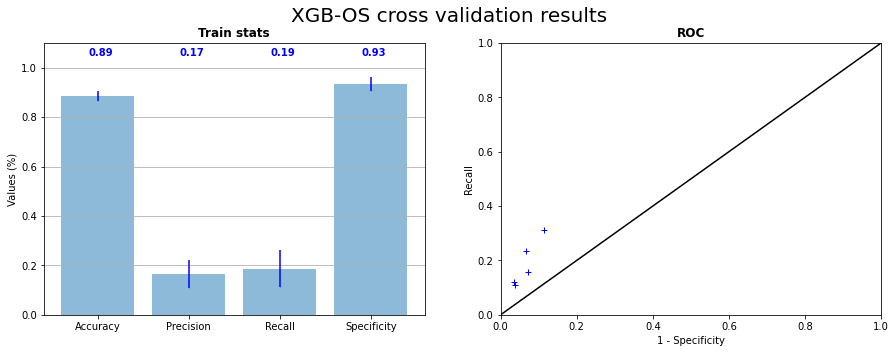

In [38]:
# NO CODE

file_res = "../../../RUN_GRICAD/res/CV_XGB-OS_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_XGB-OS_confmats.txt"

utils.plot_res_CV(file_res,Rcurve =False)

:::{figure-md} fig:XGB-OS_ls
<img src="../../img/vide.png" >

X Gradient Boost cross validation with **oversampling** on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:XGB-OS_CMp
<img src="../../img/XGB_OS_CMp.png" >

Confusion matrix of prediction of XGB on CI04 with learning with **oversampling** on 4 others samples with projection of the prediction.
:::

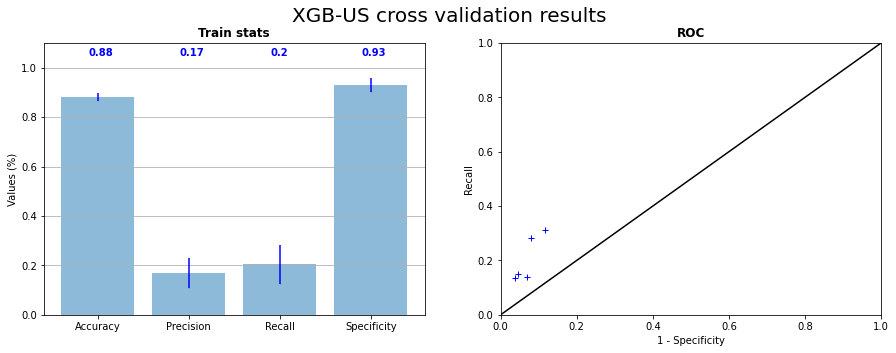

In [44]:
# NO CODE

file_res = "../../../RUN_GRICAD/res/CV_XGB-US_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_XGB-US_confmats.txt"

utils.plot_res_CV(file_res,Rcurve =False)

:::{figure-md} fig:XGB-US_ls
<img src="../../img/vide.png" >

X Gradient Boost cross validation with **undersampling** on the 5 samples statistics and corresponding ROC curve
:::

:::{figure-md} fig:XGB-US_CMp
<img src="../../img/XGB_US_CMp.png" >

Confusion matrix of prediction of XGB on CI04 with learning with **undersampling** on 4 others samples with projection of the prediction.
:::